In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
data1 = pd.read_csv("heart.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Scatter plots
hd=data1.HeartDisease.apply(lambda x: 'Heart Disease' if x==1 else 'No Disease')
fig = px.scatter_matrix(data1, 
                        dimensions=['Age',  
        'RestingBP', 'Cholesterol',   
     'MaxHR', 'Oldpeak'],
                        color=hd, color_discrete_sequence=['green','red'])
fig.update_traces(marker=dict(line_color='black', size=7, opacity=.7, line_width=0.5), 
                  diagonal_visible=False, showupperhalf=False)
fig.update_layout(title='Heart Disease Pair Plots', 
                  legend=dict(title="",orientation="h", yanchor="bottom", y=.99, xanchor="center", x=.49, 
                              traceorder='reversed'), width=700, height=800)
fig.show()

In [7]:
# Correlations
corr=data1.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='matter', 
                                  reversescale=False, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(title="Heart Disease Correlations")
fig.show()

C:\Users\Yash\AppData\Local\Temp\ipykernel_11720\598729807.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [8]:
#the hardcoding, specifically selecting hypertensive patients BP 130 and more for all ages dataset 1

hypertension_patients = []
for i,row in data1.iterrows():
    if data1.loc[i, "RestingBP"] >= 130:
        hypertension_patients.append(row)

htd_patients1 = pd.DataFrame(hypertension_patients, columns=['Age', 'Sex', 
     'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
     'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',  'HeartDisease'])


In [9]:
htd_patients1 = pd.get_dummies(htd_patients1, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [10]:
htd_patients1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                543 non-null    int64  
 1   RestingBP          543 non-null    int64  
 2   Cholesterol        543 non-null    int64  
 3   FastingBS          543 non-null    int64  
 4   MaxHR              543 non-null    int64  
 5   Oldpeak            543 non-null    float64
 6   HeartDisease       543 non-null    int64  
 7   Sex_F              543 non-null    uint8  
 8   Sex_M              543 non-null    uint8  
 9   ChestPainType_ASY  543 non-null    uint8  
 10  ChestPainType_ATA  543 non-null    uint8  
 11  ChestPainType_NAP  543 non-null    uint8  
 12  ChestPainType_TA   543 non-null    uint8  
 13  RestingECG_LVH     543 non-null    uint8  
 14  RestingECG_Normal  543 non-null    uint8  
 15  RestingECG_ST      543 non-null    uint8  
 16  ExerciseAngina_N   543 non

<Axes: >

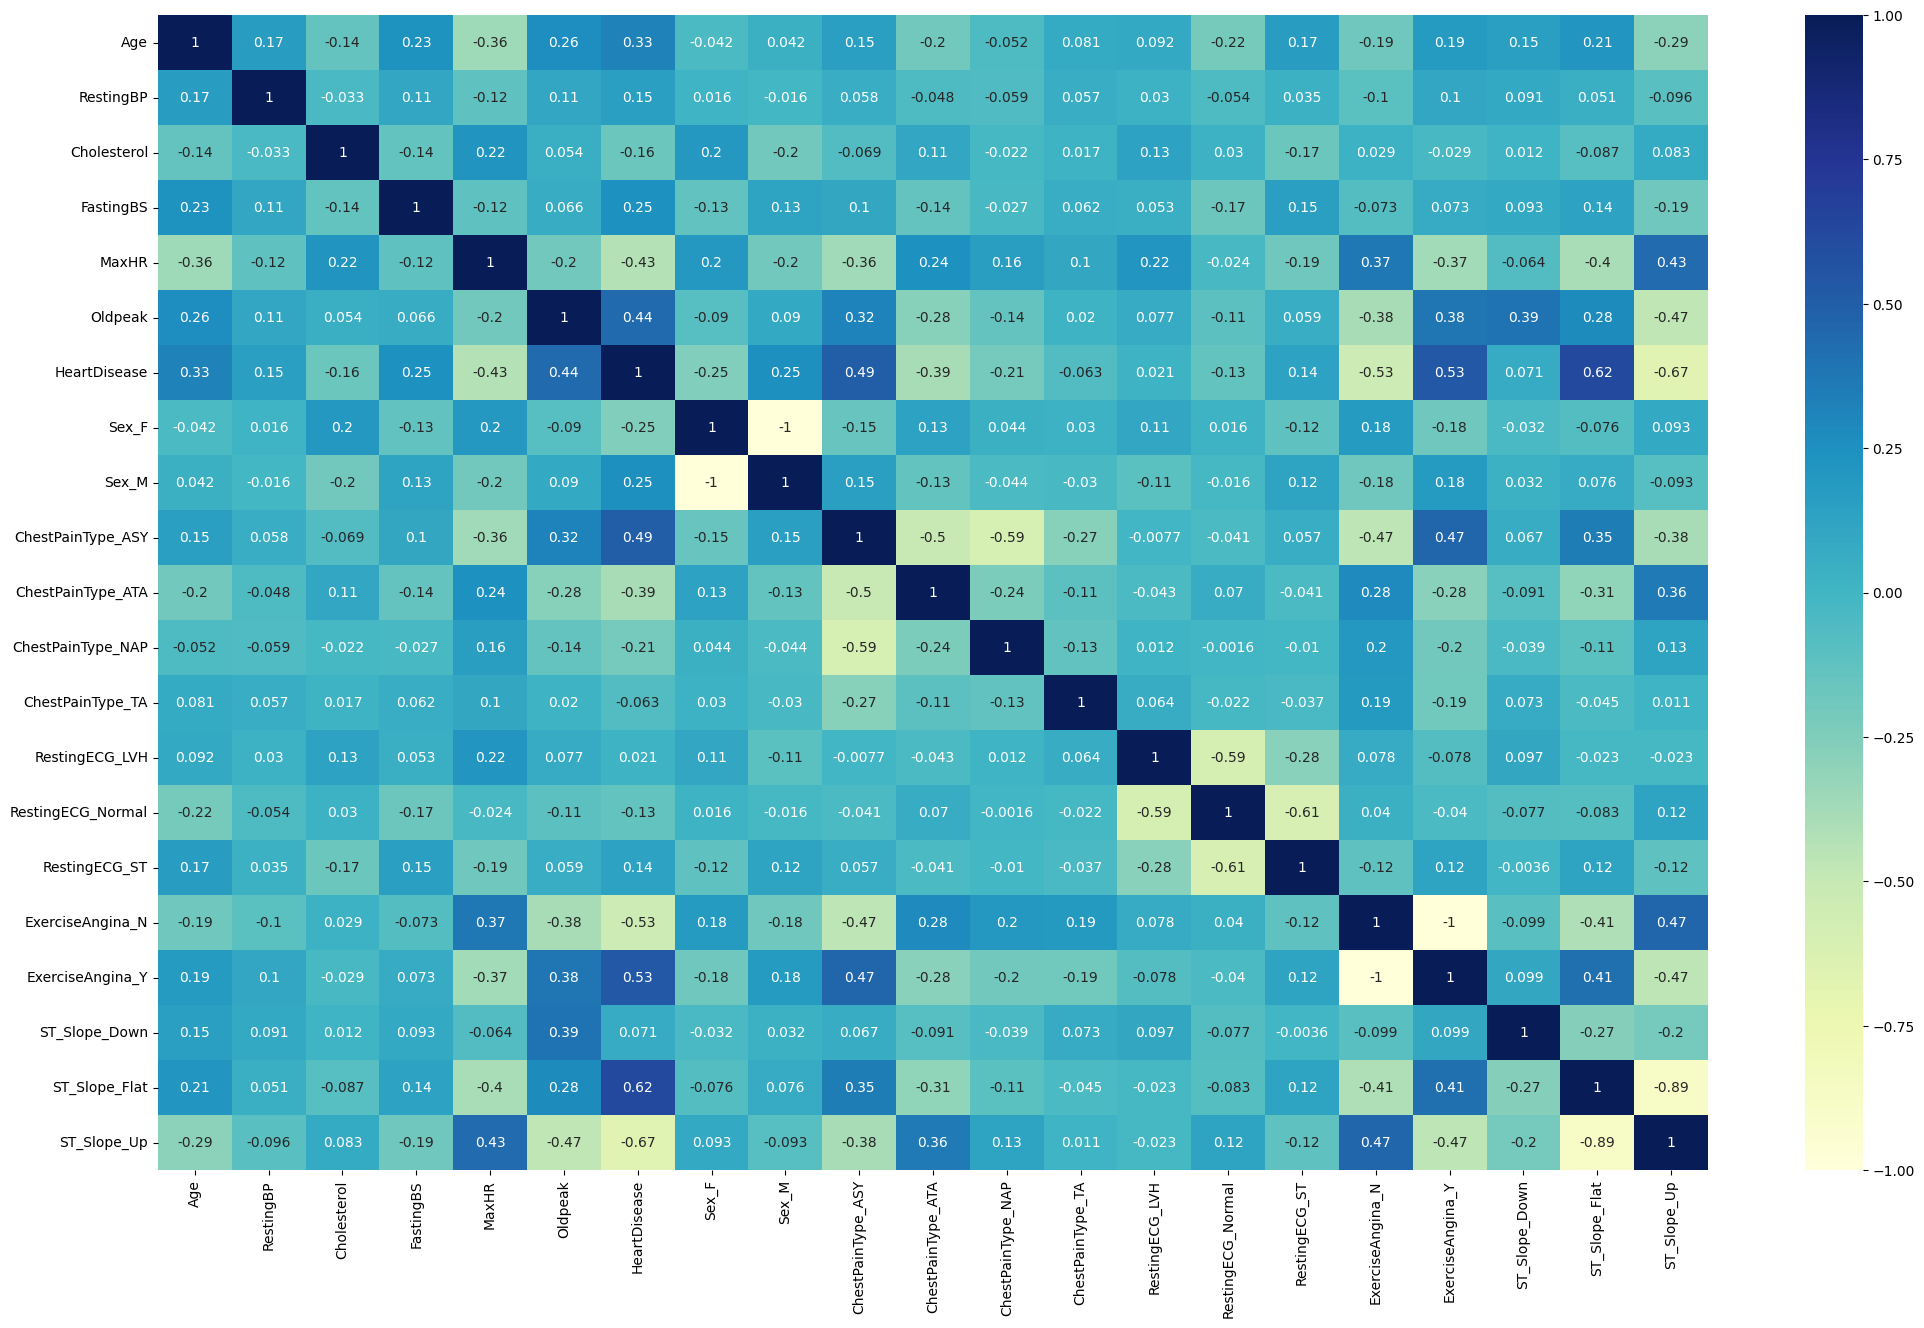

In [11]:
plt.figure(figsize = (25,15))
sns.heatmap(htd_patients1[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']].corr(), 
       cmap="YlGnBu", annot=True)